# NFL Optimization

Run the optimization setup on NFL data.

In [1]:
import sys

from glicko.update import calc_win_prob
from glicko.brier import plot_calibration_curve

sys.path.append('../../app/leagues/')

from nfl import builder

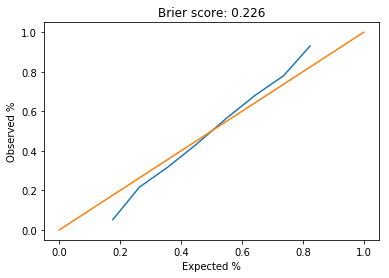

In [2]:
league = builder.get_league()
plot_calibration_curve(league)

In [3]:
best_parameters, best_values, experiment, model = builder.optimize(total_trials=25)

[INFO 07-27 17:06:27] ax.service.utils.dispatch: Using Bayesian Optimization generation strategy. Iterations after 5 will take longer to generate due to model-fitting.
[INFO 07-27 17:06:27] ax.service.managed_loop: Started full optimization with 25 steps.
[INFO 07-27 17:06:27] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-27 17:06:39] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-27 17:06:53] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-27 17:07:06] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-27 17:07:20] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-27 17:07:32] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-27 17:07:44] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-27 17:07:56] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-27 17:08:08] ax.service.managed_loop: Running optimization trial 9...
[INFO 07-27 17:08:21] ax.service.

In [4]:
best_parameters

{'init_variance': 48218.435630768574, 'variance_over_time': 15299.52361684432}

In [5]:
best_values

({'objective': 6092.285776479638},
 {'objective': {'objective': 3.9121883155420275e-05}})

# Debug
Figure out how the optimizer got to those values

In [6]:
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.plot.contour import plot_contour

In [7]:
init_notebook_plotting()

[INFO 07-27 17:12:52] ipy_plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


In [8]:
render(plot_contour(model=model, param_x='init_variance', param_y='variance_over_time', metric_name='objective'))

In [9]:
import numpy as np
from ax.plot.trace import optimization_trace_single_method

In [10]:
best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])
best_objective_plot = optimization_trace_single_method(
    y=np.minimum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)
render(best_objective_plot)

## Did it help?
Post-optimization Brier score

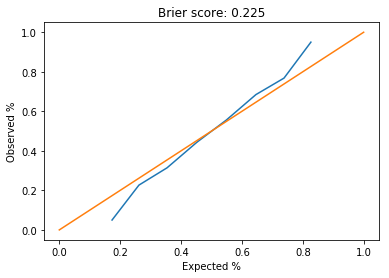

In [11]:
league = builder.get_league()
plot_calibration_curve(league)

# Ratings
Just for fun

In [12]:
for i, t in enumerate(sorted(league.teams, key=lambda t: t.rating[0], reverse=True)):
    print(f'{i+1:>2}. {t.name:<10} {t.rating[0]:.2f}')

 1. Saints     1630.54
 2. Patriots   1627.05
 3. Chiefs     1625.38
 4. Rams       1611.10
 5. Steelers   1583.47
 6. Ravens     1580.06
 7. Chargers   1579.27
 8. Bears      1576.18
 9. Eagles     1570.88
10. Seahawks   1568.69
11. Vikings    1543.80
12. Panthers   1533.60
13. Cowboys    1532.01
14. Texans     1526.35
15. Falcons    1520.25
16. Colts      1517.34
17. Titans     1509.95
18. Lions      1488.35
19. Packers    1479.71
20. Jaguars    1477.77
21. Buccaneers 1470.62
22. Broncos    1465.90
23. Browns     1465.33
24. Redskins   1465.11
25. Bengals    1458.70
26. Giants     1451.10
27. Bills      1442.43
28. 49ers      1418.12
29. Dolphins   1414.24
30. Jets       1398.27
31. Cardinals  1387.94
32. Raiders    1386.11
